Stock Market Prediction And Forecasting Using LSTM

In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history?period1=1611273600&period2=1703203200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [2]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-22,5.726563,5.796875,5.679688,5.750000,3.564792,82643200
1,1996-01-23,5.710938,5.734375,5.578125,5.593750,3.467923,66473600
2,1996-01-24,5.617188,5.781250,5.593750,5.703125,3.535730,92217600
3,1996-01-25,5.710938,5.726563,5.562500,5.585938,3.463080,59881600
4,1996-01-26,5.570313,5.679688,5.562500,5.656250,3.506669,50881600
...,...,...,...,...,...,...,...
7024,2023-12-15,366.850006,372.399994,366.279999,370.730011,370.730011,78478200
7025,2023-12-18,369.450012,373.000000,368.679993,372.649994,372.649994,21802900
7026,2023-12-19,371.489990,373.260010,369.839996,373.260010,373.260010,20603700
7027,2023-12-20,375.000000,376.029999,370.529999,370.619995,370.619995,26316700


In [3]:
df = df[['Date', 'Close']]

In [4]:
df

,Date,Close
0,1996-01-22,5.750000
1,1996-01-23,5.593750
2,1996-01-24,5.703125
3,1996-01-25,5.585938
4,1996-01-26,5.656250
...,...,...
7024,2023-12-15,370.730011
7025,2023-12-18,372.649994
7026,2023-12-19,373.260010
7027,2023-12-20,370.619995


In [5]:
df['Date']

0       1996-01-22
1       1996-01-23
2       1996-01-24
3       1996-01-25
4       1996-01-26
           ...    
7024    2023-12-15
7025    2023-12-18
7026    2023-12-19
7027    2023-12-20
7028    2023-12-21
Name: Date, Length: 7029, dtype: object

In [6]:
import datetime

In [7]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return  datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [8]:
df

,Date,Close
0,1996-01-22,5.750000
1,1996-01-23,5.593750
2,1996-01-24,5.703125
3,1996-01-25,5.585938
4,1996-01-26,5.656250
...,...,...
7024,2023-12-15,370.730011
7025,2023-12-18,372.649994
7026,2023-12-19,373.260010
7027,2023-12-20,370.619995


In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\KUMAR YASH RAJ\AppData\Local\Temp\ipykernel_552\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1996-01-22
1      1996-01-23
2      1996-01-24
3      1996-01-25
4      1996-01-26
          ...    
7024   2023-12-15
7025   2023-12-18
7026   2023-12-19
7027   2023-12-20
7028   2023-12-21
Name: Date, Length: 7029, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')
df

,Close
Date,
1996-01-22,5.750000
1996-01-23,5.593750
1996-01-24,5.703125
1996-01-25,5.585938
1996-01-26,5.656250
...,...
2023-12-15,370.730011
2023-12-18,372.649994
2023-12-19,373.260010


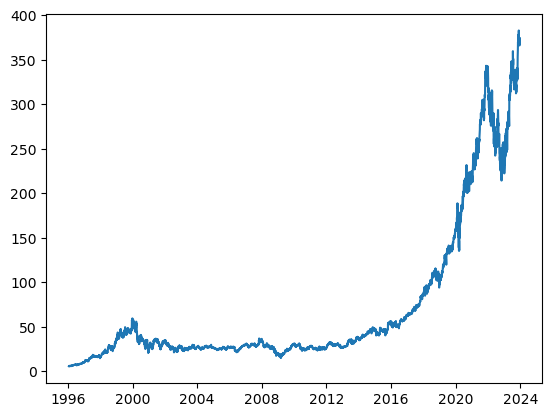

In [11]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

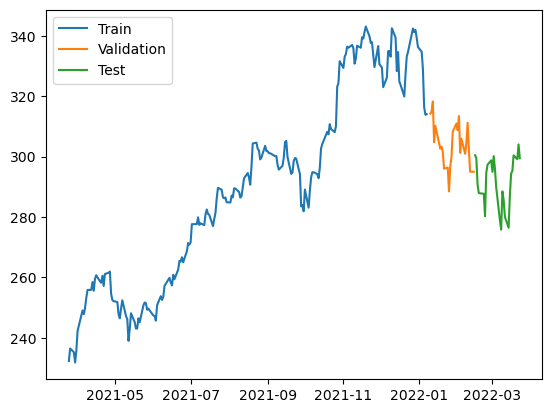

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)



Epoch 1/100


7/7 [==============================] - 10s 252ms/step - loss: 83834.4688 - mean_absolute_error: 287.7932 - val_loss: 91345.0625 - val_mean_absolute_error: 302.1458
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 83365.0703 - mean_absolute_error: 286.9764 - val_loss: 90807.3828 - val_mean_absolute_error: 301.2547
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 82835.7422 - mean_absolute_error: 286.0497 - val_loss: 90213.1016 - val_mean_absolute_error: 300.2668
Epoch 4/100
7/7 [==============================] - 0s 28ms/step - loss: 82223.5312 - mean_absolute_error: 284.9776 - val_loss: 89465.7500 - val_mean_absolute_error: 299.0196
Epoch 5/100
7/7 [==============================] - 0s 21ms/step - loss: 81399.1562 - mean_absolute_error: 283.5199 - val_loss: 88366.7500 - val_mean_absolute_error: 297.1761
Epoch 6/100
7/7 [==============================] - 0s 23ms/step - loss: 80094.0234 - mean_absolute_error: 281.1956 - val_los

7/7 [==============================] - 0s 32ms/step - loss: 19.5138 - mean_absolute_error: 3.4982 - val_loss: 41.3280 - val_mean_absolute_error: 5.2351
Epoch 93/100
7/7 [==============================] - 0s 21ms/step - loss: 20.6174 - mean_absolute_error: 3.5459 - val_loss: 65.6418 - val_mean_absolute_error: 6.6018
Epoch 94/100
7/7 [==============================] - 0s 25ms/step - loss: 19.2218 - mean_absolute_error: 3.5295 - val_loss: 72.7486 - val_mean_absolute_error: 6.9821
Epoch 95/100
7/7 [==============================] - 0s 38ms/step - loss: 20.6137 - mean_absolute_error: 3.5719 - val_loss: 36.9191 - val_mean_absolute_error: 4.8876
Epoch 96/100
7/7 [==============================] - 0s 22ms/step - loss: 18.4224 - mean_absolute_error: 3.4148 - val_loss: 34.5125 - val_mean_absolute_error: 4.7590
Epoch 97/100
7/7 [==============================] - 0s 27ms/step - loss: 18.7663 - mean_absolute_error: 3.4377 - val_loss: 53.4419 - val_mean_absolute_error: 5.9765
Epoch 98/100
7/7 [=====

7/7 [==============================] - 2s 6ms/step


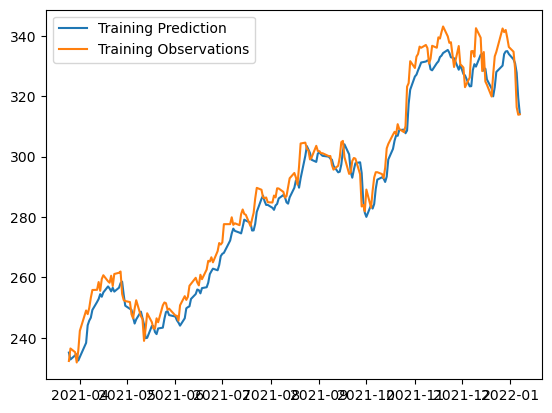

In [16]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Prediction', 'Training Observations'])

1/1 [==============================] - 0s 63ms/step


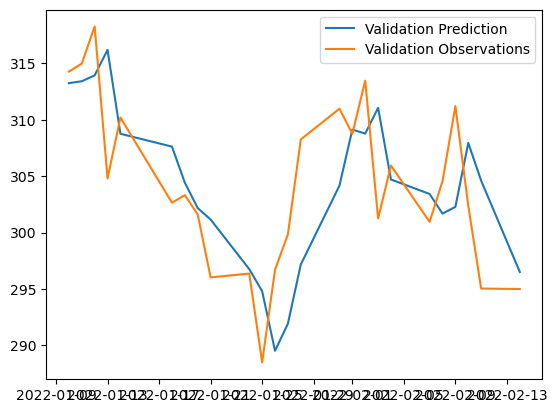

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Prediction', 'Validation Observations'])

1/1 [==============================] - 0s 64ms/step


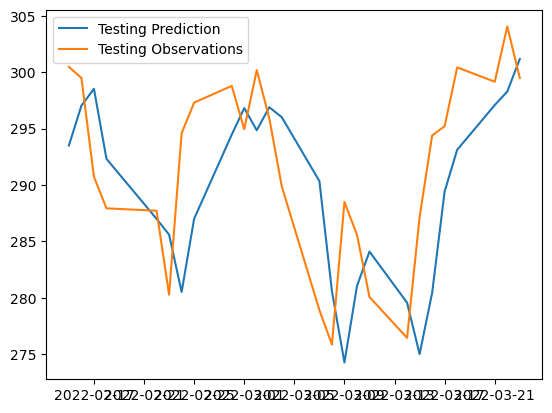

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Prediction', 'Testing Observations'])

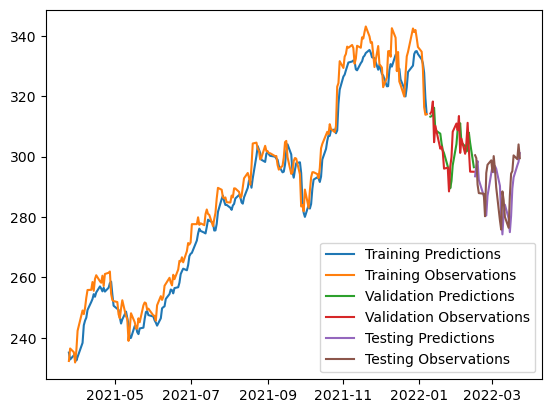

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 10s 280ms/step - loss: 84702.3281 - mean_absolute_error: 289.2967 - val_loss: 92427.5781 - val_mean_absolute_error: 303.9319
Epoch 2/100
7/7 [==============================] - 0s 23ms/step - loss: 84514.0391 - mean_absolute_error: 288.9701 - val_loss: 92256.9531 - val_mean_absolute_error: 303.6511
Epoch 3/100
7/7 [==============================] - 0s 22ms/step - loss: 84367.4922 - mean_absolute_error: 288.7168 - val_loss: 92103.9375 - val_mean_absolute_error: 303.3990
Epoch 4/100
7/7 [==============================] - 0s 21ms/step - loss: 84214.7344 - mean_absolute_error: 288.4525 - val_loss: 91928.0312 - val_mean_absolute_error: 303.1090
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 84030.0234 - mean_absolute_error: 288.1314 - val_loss: 91689.6562 - val_mean_absolute_error: 302.7155
Epoch 6/100
7/7 [==============================] - 0s 24ms/step - loss: 83756.8125 - mean_absolute_error: 287.6569 - val_loss: 9

Epoch 97/100
7/7 [==============================] - 0s 33ms/step - loss: 22.7322 - mean_absolute_error: 3.7727 - val_loss: 52.3391 - val_mean_absolute_error: 5.8008
Epoch 98/100
7/7 [==============================] - 0s 33ms/step - loss: 21.6862 - mean_absolute_error: 3.7502 - val_loss: 44.2886 - val_mean_absolute_error: 5.3688
Epoch 99/100
7/7 [==============================] - 0s 18ms/step - loss: 20.5441 - mean_absolute_error: 3.5523 - val_loss: 43.9578 - val_mean_absolute_error: 5.3512
Epoch 100/100
7/7 [==============================] - 0s 19ms/step - loss: 20.7896 - mean_absolute_error: 3.6149 - val_loss: 37.1694 - val_mean_absolute_error: 4.9019


In [21]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 63ms/step


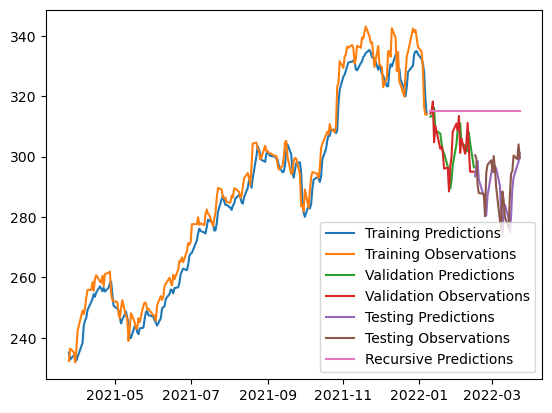

In [22]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])